In [1]:
# If this looks a mess my notebook "broke" 11/30 and now i'm scrambling to fix it.

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np


csv_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'

data_csv = pd.read_csv(csv_file_path)

data_csv.head()

C:\Users\iliss\AppData\Local\Temp\ipykernel_428\4048047921.py:9: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  data_csv = pd.read_csv(csv_file_path)


,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,9/27/2022,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,12/23/2020,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,6/22/2021,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,3/7/2022,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,11/4/2021,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,Sep-90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
columns_to_drop = ['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5', 
                   'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10']

data_csv = data_csv.drop(columns=columns_to_drop)

# drop the empty columns

In [3]:
data_csv.columns = [c.replace(' ', '_') for c in data_csv.columns]

In [4]:
# 1. In which domains (and sub-domains) are children performing highest and lowest?

In [5]:
data_csv.columns.values.tolist()

['Child_ID',
 'Gender',
 'Date_of_Birth',
 'Location_-_Sub_Level_1',
 'Program_Label',
 'Adaptive_Sum_of_Scaled_Scores',
 'Adaptive_Developmental_Quotient',
 'Adaptive_Percentile_Rank',
 'Adaptive_95%_Confidence_Interval',
 'Adaptive_RDI',
 'Adaptive_Z-Score',
 'Adaptive_T-Score',
 'Adaptive_NCE',
 'Social-Emotional_Sum_of_Scaled_Scores',
 'Social-Emotional_Developmental_Quotient',
 'Social-Emotional_Percentile_Rank',
 'Social-Emotional_95%_Confidence_Interval',
 'Social-Emotional_RDI',
 'Social-Emotional_Z-Score',
 'Social-Emotional_T-Score',
 'Social-Emotional_NCE',
 'Communication_Sum_of_Scaled_Scores',
 'Communication_Developmental_Quotient',
 'Communication_Percentile_Rank',
 'Communication_95%_Confidence_Interval',
 'Communication_RDI',
 'Communication_Z-Score',
 'Communication_T-Score',
 'Communication_NCE',
 'Motor_Sum_of_Scaled_Scores',
 'Motor_Developmental_Quotient',
 'Motor_Percentile_Rank',
 'Motor_95%_Confidence_Interval',
 'Motor_RDI',
 'Motor_Z-Score',
 'Motor_T-Score',

In [6]:
adaptive_domain = data_csv[[
    'Adaptive_Sum_of_Scaled_Scores','Adaptive_Developmental_Quotient',
 'Adaptive_Percentile_Rank',
 'Adaptive_95%_Confidence_Interval',
 'Adaptive_RDI',
 'Adaptive_Z-Score',
 'Adaptive_T-Score',
 'Adaptive_NCE',
 'Social-Emotional_Sum_of_Scaled_Scores',
 'Social-Emotional_Developmental_Quotient',
 'Social-Emotional_Percentile_Rank',
 'Social-Emotional_95%_Confidence_Interval',
 'Social-Emotional_RDI',
 'Social-Emotional_Z-Score',
 'Social-Emotional_T-Score',
 'Social-Emotional_NCE',
 'Communication_Sum_of_Scaled_Scores',
 'Communication_Developmental_Quotient',
 'Communication_Percentile_Rank',
 'Communication_95%_Confidence_Interval',
 'Communication_RDI',
 'Communication_Z-Score',
 'Communication_T-Score',
 'Communication_NCE',
 'Motor_Sum_of_Scaled_Scores',
 'Motor_Developmental_Quotient',
 'Motor_Percentile_Rank',
 'Motor_95%_Confidence_Interval',
 'Motor_RDI',
 'Motor_Z-Score',
 'Motor_T-Score',
 'Motor_NCE',
 'Cognitive_Sum_of_Scaled_Scores',
 'Cognitive_Developmental_Quotient',
 'Cognitive_Percentile_Rank',
 'Cognitive_95%_Confidence_Interval',
 'Cognitive_RDI',
 'Cognitive_Z-Score',
 'Cognitive_T-Score',
 'Cognitive_NCE',
 'BDI-3_Total_Sum_of_Scaled_Scores',
 'BDI-3_Total_Developmental_Quotient',
 'BDI-3_Total_Percentile_Rank',
 'BDI-3_Total_90%_Confidence_Interval',
 'BDI-3_Total_95%_Confidence_Interval',
 'BDI-3_Total_Z-Score',
 'BDI-3_Total_T-Score',
 'BDI-3_Total_NCE',
 'Adaptive-Self_Care_Date_of_Testing',
 'Adaptive-Self_Care_RS',
 'Adaptive-Self_Care_SS',
 'Adaptive-Self_Care_PR',
 'Adaptive-Self_Care_AE',
 'Adaptive-Self_Care_RDI',
 'Adaptive-Self_Care_CSS',
 'Adaptive-Self_Care_CSS_90%',
 'Adaptive-Self_Care_Z-Score',
 'Adaptive-Self_Care_T-Score',
 'Adaptive-Self_Care_NCE',
 'Adaptive-Personal_Responsibility_Date_of_Testing',
 'Adaptive-Personal_Responsibility_RS',
 'Adaptive-Personal_Responsibility_SS',
 'Adaptive-Personal_Responsibility_PR',
 'Adaptive-Personal_Responsibility_AE',
 'Adaptive-Personal_Responsibility_RDI',
 'Adaptive-Personal_Responsibility_CSS',
 'Adaptive-Personal_Responsibility_CSS_90%',
 'Adaptive-Personal_Responsibility_Z-Score',
 'Adaptive-Personal_Responsibility_T-Score',
 'Adaptive-Personal_Responsibility_NCE',
 'Social_Emotional-Adult_Interaction_Date_of_Testing',
 'Social_Emotional-Adult_Interaction_RS',
 'Social_Emotional-Adult_Interaction_SS',
 'Social_Emotional-Adult_Interaction_PR',
 'Social_Emotional-Adult_Interaction_AE',
 'Social_Emotional-Adult_Interaction_RDI',
 'Social_Emotional-Adult_Interaction_CSS',
 'Social_Emotional-Adult_Interaction_CSS_90%',
 'Social_Emotional-Adult_Interaction_Z-Score',
 'Social_Emotional-Adult_Interaction_T-Score',
 'Social_Emotional-Adult_Interaction_NCE',
 'Social_Emotional-Peer_Interaction_Date_of_Testing',
 'Social_Emotional-Peer_Interaction_RS',
 'Social_Emotional-Peer_Interaction_SS',
 'Social_Emotional-Peer_Interaction_PR',
 'Social_Emotional-Peer_Interaction_AE',
 'Social_Emotional-Peer_Interaction_RDI',
 'Social_Emotional-Peer_Interaction_CSS',
 'Social_Emotional-Peer_Interaction_CSS_90%',
 'Social_Emotional-Peer_Interaction_Z-Score',
 'Social_Emotional-Peer_Interaction_T-Score',
 'Social_Emotional-Peer_Interaction_NCE',
 'Social_Emotional-Self_Concept_/_Social_Role_Date_of_Testing',
 'Social_Emotional-Self_Concept_/_Social_Role_RS',
 'Social_Emotional-Self_Concept_/_Social_Role_SS',
 'Social_Emotional-Self_Concept_/_Social_Role_PR',
 'Social_Emotional-Self_Concept_/_Social_Role_AE',
 'Social_Emotional-Self_Concept_/_Social_Role_RDI',
 'Social_Emotional-Self_Concept_/_Social_Role_CSS',
 'Social_Emotional-Self_Concept_/_Social_Role_CSS_90%',
 'Social_Emotional-Self_Concept_/_Social_Role_Z-Score',
 'Social_Emotional-Self_Concept_/_Social_Role_T-Score',
 'Social_Emotional-Self_Concept_/_Social_Role_NCE',
 'Communication-Receptive_Communication_Date_of_Testing',
 'Communication-Receptive_Communication_RS',
 'Communication-Receptive_Communication_SS',
 'Communication-Receptive_Communication_PR',
 'Communication-Receptive_Communication_AE',
 'Communication-Receptive_Communication_RDI',
 'Communication-Receptive_Communication_CSS',
 'Communication-Receptive_Communication_CSS_90%_',
 'Communication-Receptive_Communication_Z-Score',
 'Communication-Receptive_Communication_T-Score',
 'Communication-Receptive_Communication_NCE',
 'Communication-Expressive_Communication_Date_of_Testing',
 'Communication-Expressive_Communication_RS',
 'Communication-Expressive_Communication_SS',
 'Communication-Expressive_Communication_PR',
 'Communication-Expressive_Communication_AE',
 'Communication-Expressive_Communication_RDI',
 'Communication-Expressive_Communication_CSS',
 'Communication-Expressive_Communication_CSS_90%_',
 'Communication-Expressive_Communication_Z-Score',
 'Communication-Expressive_Communication_T-Score',
 'Communication-Expressive_Communication_NCE',
 'Motor-Gross_Motor_Date_of_Testing',
 'Motor-Gross_Motor_RS',
 'Motor-Gross_Motor_SS',
 'Motor-Gross_Motor_PR',
 'Motor-Gross_Motor_AE',
 'Motor-Gross_Motor_RDI',
 'Motor-Gross_Motor_CSS',
 'Motor-Gross_Motor_CSS_90%_',
 'Motor-Gross_Motor_Z-Score',
 'Motor-Gross_Motor_T-Score',
 'Motor-Gross_Motor_NCE',
 'Motor-Fine_Motor_Date_of_Testing',
 'Motor-Fine_Motor_RS',
 'Motor-Fine_Motor_SS',
 'Motor-Fine_Motor_PR',
 'Motor-Fine_Motor_AE',
 'Motor-Fine_Motor_RDI',
 'Motor-Fine_Motor_CSS',
 'Motor-Fine_Motor_CSS_90%',
 'Motor-Fine_Motor_Z-Score',
 'Motor-Fine_Motor_T-Score',
 'Motor-Fine_Motor_NCE',
 'Motor-Perceptual_Motor_Date_of_Testing',
 'Motor-Perceptual_Motor_RS',
 'Motor-Perceptual_Motor_SS',
 'Motor-Perceptual_Motor_PR',
 'Motor-Perceptual_Motor_AE',
 'Motor-Perceptual_Motor_RDI',
 'Motor-Perceptual_Motor_CSS',
 'Motor-Perceptual_Motor_CSS_90%_',
 'Motor-Perceptual_Motor_Z-Score',
 'Motor-Perceptual_Motor_T-Score',
 'Motor-Perceptual_Motor_NCE',
 'Cognitive-Attention_and_Memory_Date_of_Testing',
 'Cognitive-Attention_and_Memory_RS',
 'Cognitive-Attention_and_Memory_SS',
 'Cognitive-Attention_and_Memory_PR',
 'Cognitive-Attention_and_Memory_AE',
 'Cognitive-Attention_and_Memory_RDI',
 'Cognitive-Attention_and_Memory_CSS',
 'Cognitive-Attention_and_Memory_CSS_90%',
 'Cognitive-Attention_and_Memory_Z-Score',
 'Cognitive-Attention_and_Memory_T-Score',
 'Cognitive-Attention_and_Memory_NCE',
 'Cognitive-Reasoning_/_Academic_Skills_Date_of_Testing',
 'Cognitive-Reasoning_/_Academic_Skills_RS',
 'Cognitive-Reasoning_/_Academic_Skills_SS',
 'Cognitive-Reasoning_/_Academic_Skills_PR',
 'Cognitive-Reasoning_/_Academic_Skills_AE',
 'Cognitive-Reasoning_/_Academic_Skills_RDI',
 'Cognitive-Reasoning_/_Academic_Skills_CSS',
 'Cognitive-Reasoning_/_Academic_Skills_CSS_90%',
 'Cognitive-Reasoning_/_Academic_Skills_Z-Score',
 'Cognitive-Reasoning_/_Academic_Skills_T-Score',
 'Cognitive-Reasoning_/_Academic_Skills_NCE',
 'Cognitive-Perception_and_Concepts_Date_of_Testing',
 'Cognitive-Perception_and_Concepts_RS',
 'Cognitive-Perception_and_Concepts_SS',
 'Cognitive-Perception_and_Concepts_PR',
 'Cognitive-Perception_and_Concepts_AE',
 'Cognitive-Perception_and_Concepts_RDI',
 'Cognitive-Perception_and_Concepts_CSS',
 'Cognitive-Perception_and_Concepts_CSS_90%',
 'Cognitive-Perception_and_Concepts_Z-Score',
 'Cognitive-Perception_and_Concepts_T-Score',
 'Cognitive-Perception_and_Concepts_NCE']]






In [7]:
print(adaptive_domain.columns)


Index(['Adaptive_Sum_of_Scaled_Scores', 'Adaptive_Developmental_Quotient',
       'Adaptive_Percentile_Rank', 'Adaptive_95%_Confidence_Interval',
       'Adaptive_RDI', 'Adaptive_Z-Score', 'Adaptive_T-Score', 'Adaptive_NCE',
       'Social-Emotional_Sum_of_Scaled_Scores',
       'Social-Emotional_Developmental_Quotient',
       ...
       'Cognitive-Perception_and_Concepts_RS',
       'Cognitive-Perception_and_Concepts_SS',
       'Cognitive-Perception_and_Concepts_PR',
       'Cognitive-Perception_and_Concepts_AE',
       'Cognitive-Perception_and_Concepts_RDI',
       'Cognitive-Perception_and_Concepts_CSS',
       'Cognitive-Perception_and_Concepts_CSS_90%',
       'Cognitive-Perception_and_Concepts_Z-Score',
       'Cognitive-Perception_and_Concepts_T-Score',
       'Cognitive-Perception_and_Concepts_NCE'],
      dtype='object', length=191)


In [8]:
adaptive_domain.to_csv('../data/adaptive_domain.csv')

In [9]:
csv_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'
df = pd.read_csv(csv_file_path)

non_numeric_columns = df.select_dtypes(exclude=['number']).columns
# Remove columns with non-numeric values from the DataFrame
df = df.drop(columns=non_numeric_columns)

# Calculate the mean for each column
column_means = df.mean()

print(column_means)

C:\Users\iliss\AppData\Local\Temp\ipykernel_428\1184115229.py:2: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path)


Adaptive Sum of Scaled Scores              11.728268
Adaptive Developmental Quotient            86.988304
Adaptive T-Score                           41.326204
Social-Emotional Sum of Scaled Scores      22.773770
Social-Emotional Developmental Quotient    94.293601
                                             ...    
Code 6                                           NaN
Code 7                                           NaN
Code 8                                           NaN
Code 9                                           NaN
Code 10                                          NaN
Length: 79, dtype: float64


In [10]:
grouped_columns = df.columns.to_series().groupby(df.columns.str.split('_').str[0], axis=0)


In [11]:
averages_df = pd.DataFrame()


In [12]:
adaptive_df = pd.DataFrame()
social_df = pd.DataFrame()
communication_df = pd.DataFrame()
motor_df = pd.DataFrame()
cognitive_df = pd.DataFrame()

In [13]:
for column in df.columns:
    if column.startswith('Adaptive'):
        adaptive_df[column] = df[column]
    elif column.startswith('Social'):
        social_df[column] = df[column]
    elif column.startswith('Communication'):
        communication_df[column] = df[column]
    elif column.startswith('Motor'):
        motor_df[column] = df[column]
    elif column.startswith('Cognitive'):
        cognitive_df[column] = df[column]

In [14]:
adaptive_average = adaptive_df.mean(axis=1)
social_average = social_df.mean(axis=1)
communication_average = communication_df.mean(axis=1)
motor_average = motor_df.mean(axis=1)
cognitive_average = cognitive_df.mean(axis=1)

In [15]:
grouped_averages_df = pd.DataFrame({
    'Adaptive_Average': adaptive_average,
    'Social_Average': social_average,
    'Communication_Average': communication_average,
    'Motor_Average': motor_average,
    'Cognitive_Average': cognitive_average
})

In [16]:
print(grouped_averages_df)


       Adaptive_Average  Social_Average  Communication_Average  Motor_Average  \
0             80.571429      124.363636              97.090909      94.272727   
1            112.454545      129.533333             115.363636     124.600000   
2             97.428571      115.272727             104.000000     120.636364   
3            104.000000      115.545455              98.454545      99.727273   
4             82.142857      101.636364              91.818182      94.909091   
...                 ...             ...                    ...            ...   
23942         84.285714      110.000000              98.363636      91.909091   
23943        126.909091      136.266667             126.272727     135.533333   
23944        119.818182      128.133333              90.454545     126.133333   
23945        117.636364      125.600000             113.818182     134.533333   
23946         76.857143       99.727273              93.181818      84.545455   

       Cognitive_Average  


In [17]:
domain_columns = ['Adaptive', 'Social-Emotional', 'Communication', 'Motor', 'Cognitive']

In [18]:
averages_df = pd.DataFrame(columns=['Domain', 'Average'])

In [19]:
data = {'Domain': ['Adaptive', 'Social-Emotional', 'Communication', 'Motor', 'Cognitive'],
        'Average': [10, 15, 8, 12, 20]}

In [20]:
averages_df = pd.DataFrame(data)

In [21]:
averages_df = averages_df.sort_values(by='Average', ascending=False)

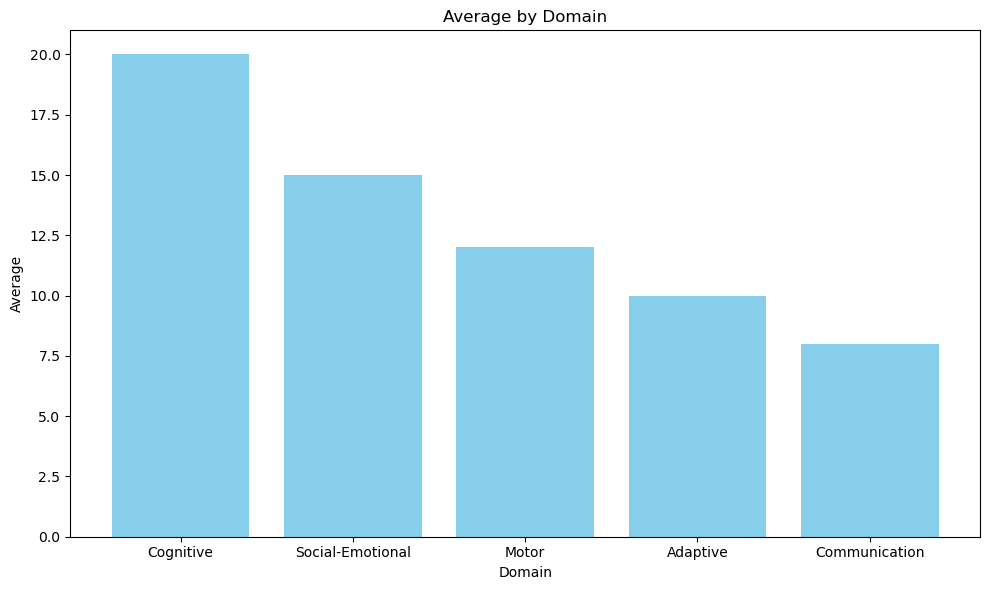

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(averages_df['Domain'], averages_df['Average'], color='skyblue')
plt.xlabel('Domain')
plt.ylabel('Average')
plt.title('Average by Domain')
plt.xticks(rotation=360)
plt.tight_layout()

plt.show()

In [23]:
adaptive_domain = pd.read_csv('../data/adaptive_domain.csv')

numeric_columns = adaptive_domain.select_dtypes(include=['number'])
column_averages = numeric_columns.mean()

for column_name, average_value in column_averages.items():
    print(f"Average of {column_name}: {average_value}")



Average of Unnamed: 0: 11973.0
Average of Adaptive_Sum_of_Scaled_Scores: 11.728267680354234
Average of Adaptive_Developmental_Quotient: 86.98830360499603
Average of Adaptive_T-Score: 41.32620410209282
Average of Social-Emotional_Sum_of_Scaled_Scores: 22.773770217745643
Average of Social-Emotional_Developmental_Quotient: 94.2936013708363
Average of Social-Emotional_T-Score: 46.19747565511765
Average of Communication_Sum_of_Scaled_Scores: 13.020240883238541
Average of Communication_Developmental_Quotient: 79.06072264971563
Average of Communication_T-Score: 36.040481766477086
Average of Motor_Sum_of_Scaled_Scores: 22.871654399464703
Average of Motor_Developmental_Quotient: 93.87571094011375
Average of Cognitive_Sum_of_Scaled_Scores: 20.360779068795452
Average of Cognitive_Developmental_Quotient: 88.41218757836663
Average of BDI-3_Total_Sum_of_Scaled_Scores: 90.74614740368509
Average of BDI-3_Total_Developmental_Quotient: 87.21633165829145
Average of BDI-3_Total_T-Score: 41.64362105263158


C:\Users\iliss\AppData\Local\Temp\ipykernel_428\4278800513.py:1: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  adaptive_domain = pd.read_csv('../data/adaptive_domain.csv')


In [24]:
grouped_averages_df

,Adaptive_Average,Social_Average,Communication_Average,Motor_Average,Cognitive_Average
0,80.571429,124.363636,97.090909,94.272727,109.400000
1,112.454545,129.533333,115.363636,124.600000,127.071429
2,97.428571,115.272727,104.000000,120.636364,112.300000
3,104.000000,115.545455,98.454545,99.727273,119.400000
4,82.142857,101.636364,91.818182,94.909091,115.400000
...,...,...,...,...,...
23942,84.285714,110.000000,98.363636,91.909091,104.200000
23943,126.909091,136.266667,126.272727,135.533333,140.285714
23944,119.818182,128.133333,90.454545,126.133333,127.357143
23945,117.636364,125.600000,113.818182,134.533333,130.071429


In [83]:
selected_columns = ['Adaptive Sum of Scaled Scores', 'Adaptive Developmental Quotient', 
                    'Adaptive Percentile Rank', 'Personal-Social Sum of Scaled Scores', 
                    'Personal-Social Developmental Quotient', 'Personal-Social Percentile Rank']


In [84]:
score_columns_for_correlation = [
    'Adaptive Sum of Scaled Scores', 'Social-Emotional Sum of Scaled Scores', 
    'Communication Sum of Scaled Scores', 'Motor Sum of Scaled Scores'
]

In [85]:
print(averages_df)

             Domain  Average
4         Cognitive       20
1  Social-Emotional       15
3             Motor       12
0          Adaptive       10
2     Communication        8


In [59]:
# 6. Is there any difference in scoring noted based on evaluation type?
# Using new cleaned data from Aarons team.

# Eligibility Evaluation shows higher Developmental Quotients and Percentile Ranks, 
# while the subsequent Annual and Milestone/Exit Evaluations show higher Scaled Scores, particularly 
# in the Social-Emotional domain.

In [86]:
numeric_score_columns = [col for col in teis.columns if pd.api.types.is_numeric_dtype(teis[col])]

numeric_score_columns[:10]

['Adaptive Sum of Scaled Scores',
 'Adaptive Developmental Quotient',
 'Adaptive Percentile Rank',
 'Adaptive T-Score',
 'Social-Emotional Sum of Scaled Scores',
 'Social-Emotional Developmental Quotient',
 'Social-Emotional Percentile Rank',
 'Social-Emotional T-Score',
 'Communication Sum of Scaled Scores',
 'Communication Developmental Quotient']

In [87]:
teis = pd.read_csv('../data/teis.csv', dtype = {"Child ID" : object, "Cognitive T-Score" : object})

In [88]:
# compare the scores based on the type of evaluation: 
# Eligibility Evaluation, Annual Evaluation, and Milestone or Exit Evaluation.

eligibility_eval = teis[teis['Program Label'] == 'BDI-3 Eligibility Evaluation']
annual_eval = teis[teis['Program Label'] == 'BDI-3 Annual Evaluation']
milestone_exit_eval = teis[teis['Program Label'] == 'BDI-3 Milestone or Exit Evaluation']



In [89]:
numeric_score_columns = [col for col in numeric_score_columns if pd.api.types.is_numeric_dtype(teis[col])]

In [90]:
mean_eligibility_numeric = eligibility_eval[numeric_score_columns].mean()
mean_annual_numeric = annual_eval[numeric_score_columns].mean()
mean_milestone_exit_numeric = milestone_exit_eval[numeric_score_columns].mean()

mean_scores_comparison_numeric = pd.DataFrame({
    'Eligibility Evaluation': mean_eligibility_numeric,
    'Annual Evaluation': mean_annual_numeric,
    'Milestone/Exit Evaluation': mean_milestone_exit_numeric
})

mean_scores_comparison_numeric

,Eligibility Evaluation,Annual Evaluation,Milestone/Exit Evaluation
Adaptive Sum of Scaled Scores,10.574252,12.904847,15.047198
Adaptive Developmental Quotient,89.184238,84.604570,85.460177
Adaptive Percentile Rank,31.997580,26.487637,28.064897
Adaptive T-Score,42.791482,39.735607,40.306785
Social-Emotional Sum of Scaled Scores,21.370553,24.218261,26.386431
...,...,...,...
Code 6,NaN,NaN,NaN
Code 7,NaN,NaN,NaN
Code 8,NaN,NaN,NaN
Code 9,NaN,NaN,NaN


In [110]:
comparison_transposed = mean_scores_comparison_numeric.transpose()

In [111]:
# 7. Is there any notable pattern of scoring by region? Note: TEIS contracts with three agencies for evaluations (one per grand region) as follows:  
# * East TN, First TN and Southeast
# * Greater Nashville, Upper Cumberland, and South Central
# * Northwest, Southwest, and Memphis Delta

# Greater Nashville shows higher scores in the Adaptive and Social-Emotional domains 
#compared to other locations like First Tennessee and Memphis Delta.

In [112]:
df_cleaned = pd.read_csv('../data/teis.csv')

distinct_locations = df_cleaned['Location - Sub Level 1'].unique()


numeric_score_columns = df_cleaned.select_dtypes(include=[np.number]).columns

location_scores = df_cleaned.groupby('Location - Sub Level 1')[numeric_score_columns].mean()

distinct_locations, location_scores.head()


C:\Users\iliss\AppData\Local\Temp\ipykernel_428\2800088911.py:1: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv('../data/teis.csv')


(array(['Southwest', 'Greater Nashville', 'First Tennessee',
        'Southeast Tennessee', 'Memphis Delta', 'Northwest',
        'Upper Cumberland', 'East Tennessee', 'South Central', nan],
       dtype=object),
                         Adaptive Sum of Scaled Scores  \
 Location - Sub Level 1                                  
 East Tennessee                              11.257439   
 First Tennessee                             10.929550   
 Greater Nashville                           12.259094   
 Memphis Delta                               11.588627   
 Northwest                                   12.173985   
 
                         Adaptive Developmental Quotient  \
 Location - Sub Level 1                                    
 East Tennessee                                86.272704   
 First Tennessee                               85.573386   
 Greater Nashville                             88.573105   
 Memphis Delta                                 85.721718   
 Northwest         

In [95]:
distinct_locations = df_cleaned['Location - Sub Level 1'].unique()

location_scores = df_cleaned.groupby('Location - Sub Level 1')[numeric_score_columns].mean()

location_scores.head()

,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive T-Score,Social-Emotional Sum of Scaled Scores,Social-Emotional Developmental Quotient,Social-Emotional Percentile Rank,Social-Emotional T-Score,Communication Sum of Scaled Scores,Communication Developmental Quotient,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
Location - Sub Level 1,,,,,,,,,,,,,,,,,,,,,
East Tennessee,11.257439,86.272704,28.324968,40.854851,21.546984,91.876780,36.011908,44.580637,13.776081,81.328242,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
First Tennessee,10.929550,85.573386,27.288160,40.375734,21.402941,91.514216,34.603431,44.341176,13.678291,81.034872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Greater Nashville,12.259094,88.573105,31.681295,42.381366,24.265618,97.785815,46.355096,48.531000,13.051493,79.154479,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Memphis Delta,11.588627,85.721718,26.925590,40.480339,23.715064,96.011192,43.349667,47.337568,12.172163,76.516490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Northwest,12.173985,89.565866,33.840099,43.042254,24.388567,98.957746,48.615576,49.314002,13.289975,79.869925,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Figure size 2000x1000 with 0 Axes>

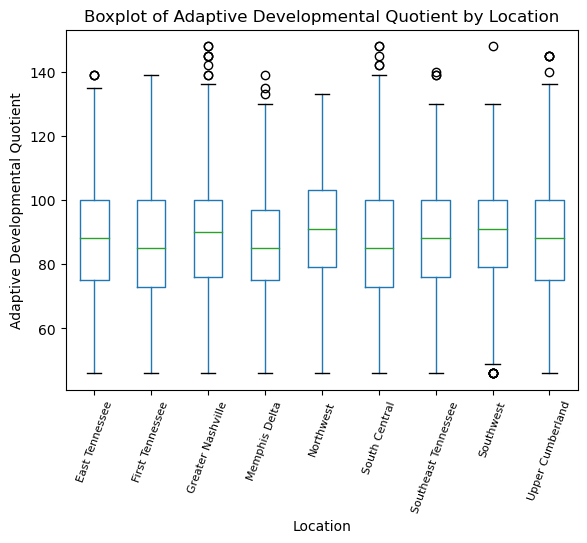

In [96]:
plt.figure(figsize=(20, 10))

selected_score_column = 'Adaptive Developmental Quotient'

df_cleaned.boxplot(column=selected_score_column, by='Location - Sub Level 1', rot=70, grid=False)

plt.title(f'Boxplot of {selected_score_column} by Location')
plt.suptitle('')
plt.xlabel('Location')
plt.ylabel(selected_score_column)
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()


<Figure size 2000x1000 with 0 Axes>

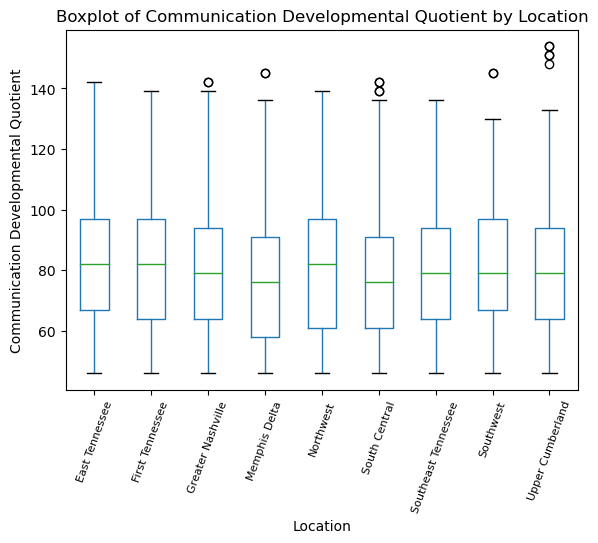

In [97]:
plt.figure(figsize=(20, 10))

selected_communication_score = 'Communication Developmental Quotient'

df_cleaned.boxplot(column=selected_communication_score, by='Location - Sub Level 1', rot=70, grid=False)

plt.title(f'Boxplot of {selected_communication_score} by Location')
plt.suptitle('')
plt.xlabel('Location')
plt.ylabel(selected_communication_score)
plt.xticks(fontsize=8)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
# yesterday my notebook was fine, today about half of it is giving me errors and I don't know why so i'm trying to fix atleast the # I was working on.

In [68]:
# 8. Is there any notable pattern of scoring by evaluator?

In [123]:
examiner_columns = [col for col in df_cleaned.columns if 'Examiner' in col]

numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
score_column_to_analyze = numeric_columns[0] if len(numeric_columns) > 0 else None

examiner_columns, score_column_to_analyze

(['Adaptive-Self Care Examiner',
  'Adaptive-Personal Responsibility Examiner',
  'Social Emotional-Adult Interaction Examiner',
  'Social Emotional-Peer Interaction Examiner',
  'Social Emotional-Self Concept / Social Role Examiner',
  'Communication-Receptive Communication Examiner',
  'Communication-Expressive Communication Examiner',
  'Motor-Gross Motor Examiner',
  'Motor-Fine Motor Examiner',
  'Motor-Perceptual Motor Examiner',
  'Cognitive-Attention and Memory Examiner',
  'Cognitive-Reasoning / Academic Skills Examiner',
  'Cognitive-Perception and Concepts Examiner'],
 'Adaptive Sum of Scaled Scores')

In [124]:
# Average score for each examiner for each score category

In [125]:
examiner_mean_scores_individual_categories = examiner_scores_melted_all.groupby(['Examiner', 'Examiner Category']).mean().reset_index()

examiner_scores_pivot = examiner_mean_scores_individual_categories.pivot(index='Examiner', 
                                                                          columns='Examiner Category', 
                                                                      values=score_column_to_analyze)

examiner_scores_pivot


Examiner Category,Adaptive-Personal Responsibility Examiner,Adaptive-Self Care Examiner,Cognitive-Attention and Memory Examiner,Cognitive-Perception and Concepts Examiner,Cognitive-Reasoning / Academic Skills Examiner,Communication-Expressive Communication Examiner,Communication-Receptive Communication Examiner,Motor-Fine Motor Examiner,Motor-Gross Motor Examiner,Motor-Perceptual Motor Examiner,Social Emotional-Adult Interaction Examiner,Social Emotional-Peer Interaction Examiner,Social Emotional-Self Concept / Social Role Examiner
Examiner,,,,,,,,,,,,,
Abby Spence,18.251142,14.087719,14.087719,14.087719,18.251142,14.087719,14.087719,14.087719,14.087719,18.251142,14.087719,18.251142,14.087719
Alexis Linville,15.921875,10.658120,10.658120,10.658120,15.921875,10.658120,10.658120,10.658120,10.658120,15.921875,10.658120,15.921875,10.658120
Alice Starnes,14.902703,11.783626,11.783626,11.783626,14.902703,11.765396,11.783626,11.783626,11.694118,14.781421,11.783626,14.902703,11.783626
Allison Coontz,11.993865,10.288732,10.288732,10.288732,11.993865,10.288732,10.288732,10.288732,10.288732,11.993865,10.288732,11.993865,10.288732
Ally Simmons,13.969072,10.722372,10.722372,10.722372,13.969072,10.722372,10.722372,10.722372,10.722372,13.969072,10.722372,13.969072,10.722372
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tiffany Maynard,14.000000,10.718391,10.718391,10.718391,14.000000,10.718391,10.718391,10.718391,10.718391,14.000000,10.718391,14.000000,10.718391
Tiffany Treadway,9.179245,8.048544,8.048544,8.048544,9.179245,8.048544,8.048544,8.048544,8.048544,9.179245,8.048544,9.179245,8.048544
Toni London,12.646154,10.552326,10.552326,10.552326,12.646154,10.552326,10.552326,10.552326,10.552326,12.646154,10.552326,12.646154,10.552326


In [117]:
# sum of all scores per examiner

examiner_sum_scores_individual_categories = examiner_scores_melted_all.groupby(['Examiner', 'Examiner Category']).sum().reset_index()

examiner_scores_sum_pivot = examiner_sum_scores_individual_categories.pivot(index='Examiner', 
                                                                            columns='Examiner Category', 
                                                                            values=score_column_to_analyze)
examiner_scores_sum_pivot.head() 


Examiner Category,Adaptive-Personal Responsibility Examiner,Adaptive-Self Care Examiner,Cognitive-Attention and Memory Examiner,Cognitive-Perception and Concepts Examiner,Cognitive-Reasoning / Academic Skills Examiner,Communication-Expressive Communication Examiner,Communication-Receptive Communication Examiner,Motor-Fine Motor Examiner,Motor-Gross Motor Examiner,Motor-Perceptual Motor Examiner,Social Emotional-Adult Interaction Examiner,Social Emotional-Peer Interaction Examiner,Social Emotional-Self Concept / Social Role Examiner
Examiner,,,,,,,,,,,,,
Abby Spence,3997.0,5621.0,5621.0,5621.0,3997.0,5621.0,5621.0,5621.0,5621.0,3997.0,5621.0,3997.0,5621.0
Alexis Linville,2038.0,3741.0,3741.0,3741.0,2038.0,3741.0,3741.0,3741.0,3741.0,2038.0,3741.0,2038.0,3741.0
Alice Starnes,2757.0,4030.0,4030.0,4030.0,2757.0,4012.0,4030.0,4030.0,3976.0,2705.0,4030.0,2757.0,4030.0
Allison Coontz,1955.0,2922.0,2922.0,2922.0,1955.0,2922.0,2922.0,2922.0,2922.0,1955.0,2922.0,1955.0,2922.0
Ally Simmons,2710.0,3978.0,3978.0,3978.0,2710.0,3978.0,3978.0,3978.0,3978.0,2710.0,3978.0,2710.0,3978.0


In [119]:
# Calculating the average score across all categories for each examiner
examiner_avg_scores = examiner_scores_sum_pivot.mean(axis=1).sort_values(ascending=False)

examiner_avg_scores_df = examiner_avg_scores.reset_index()
examiner_avg_scores_df.columns = ['Examiner', 'Average Score Across All Categories']

examiner_avg_scores_df


,Examiner,Average Score Across All Categories
0,Jasmine Jones,7538.846154
1,Kelly Bryan,5931.923077
2,Amelia Ferguson,5917.538462
3,Emily Williams,5662.692308
4,Kellie Murray,5507.692308
...,...,...
100,Sara Turner,21.153846
101,Amanda Harris,18.000000
102,Karie Quick,12.000000
103,Kendra Inman,8.000000


In [122]:
# number of exams
examiner_summary_sorted_df = examiner_summary_df.sort_values(by='Average Score Across All Categories', ascending=False)

examiner_summary_sorted_df.head()



,Examiner,Average Score Across All Categories,Number of Examinations
0,Jasmine Jones,7538.846154,5591
1,Kelly Bryan,5931.923077,5522
2,Amelia Ferguson,5917.538462,5187
3,Emily Williams,5662.692308,5501
4,Kellie Murray,5507.692308,5284


In [142]:
# Examiner Columns
potential_examiner_columns = [col for col in data_csv.columns if "examiner" in col.lower()]

# Examiner Names
def extract_examiner(row):
    for col in potential_examiner_columns:
        if pd.notnull(row[col]):
            return row[col]
    return None

data_csv['Examiner'] = data_csv.apply(extract_examiner, axis=1)

print(data_csv[['Examiner']].head())


          Examiner
0      Kelly Bryan
1       Patti Lyle
2  Karen McMillion
3   Jennifer Vines
4     Ally Simmons


In [144]:
score_columns = [col for col in data_csv.columns if "score" in col.lower() or "quotient" in col.lower() or "rank" in col.lower()]

for col in score_columns:
    data_csv[col] = pd.to_numeric(data_csv[col], errors='coerce')

melted_scores = data_csv.melt(id_vars='Examiner', value_vars=score_columns, 
                              var_name='Score_Category', value_name='Score')

# Filtering null examiners
filtered_scores = melted_scores.dropna(subset=['Score', 'Examiner'])

# mean score for each examiner across all categories
mean_scores_by_examiner = filtered_scores.groupby('Examiner')['Score'].mean().reset_index()

mean_scores_by_examiner.head()


,Examiner,Score
0,Abby Spence,42.745926
1,Alexis Linville,40.432995
2,Alice Starnes,39.900647
3,Allison Coontz,38.743985
4,Ally Simmons,39.816491


In [146]:
# number of exams for each examiner
exams_count_by_examiner = filtered_scores.groupby('Examiner').size().reset_index(name='Exams_Count')

# scores with the exams count
mean_scores_with_count = mean_scores_by_examiner.merge(exams_count_by_examiner, on='Examiner')
mean_scores_with_count.head()


,Examiner,Score,Exams_Count
0,Abby Spence,42.745926,17363
1,Alexis Linville,40.432995,13975
2,Alice Starnes,39.900647,14054
3,Allison Coontz,38.743985,11319
4,Ally Simmons,39.816491,14618


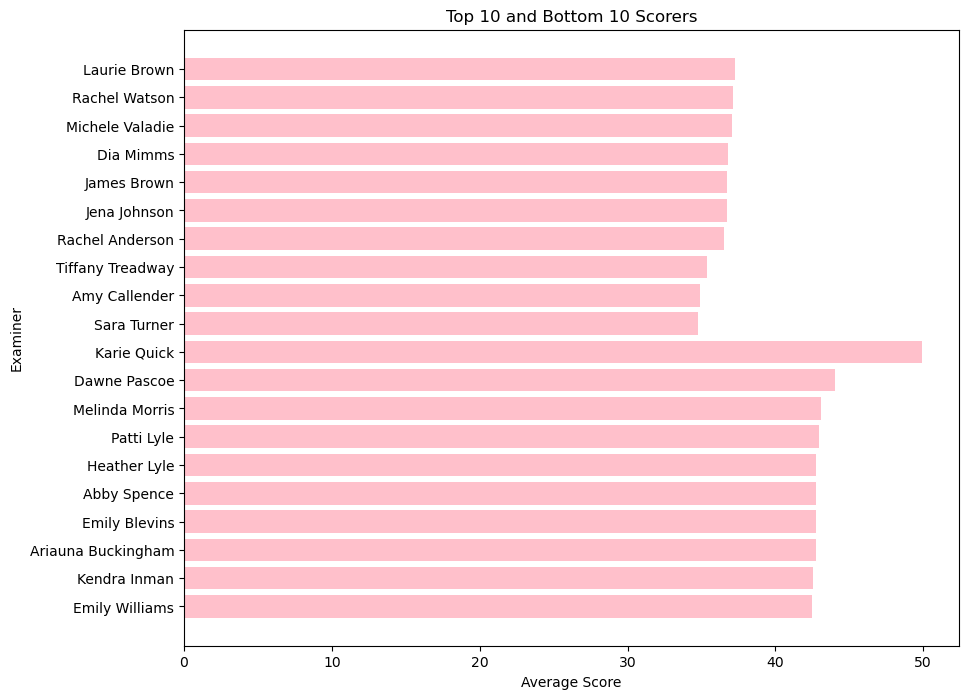

In [157]:
# examiners by their average score
sorted_scores = mean_scores_with_count.sort_values(by='Score')

# top 10 and bottom 10 examiners
top_10_scores = sorted_scores.tail(10)
bottom_10_scores = sorted_scores.head(10)

# DataFrame
combined_scores = pd.concat([top_10_scores, bottom_10_scores])

plt.figure(figsize=(10, 8))
plt.barh(combined_scores['Examiner'], combined_scores['Score'], color='pink')
plt.xlabel('Average Score')
plt.ylabel('Examiner')
plt.title('Top 10 and Bottom 10 Scorers')
plt.show()


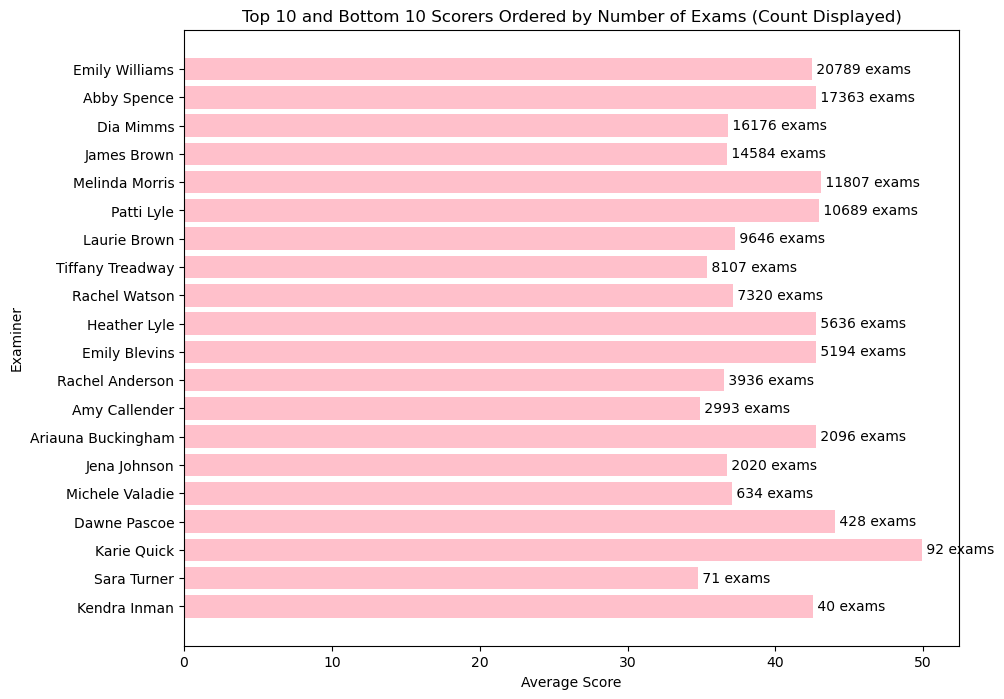

In [167]:
combined_scores_sorted_by_exams = combined_scores.sort_values(by='Exams_Count', ascending=True)

plt.figure(figsize=(10, 8))
bar_plot = plt.barh(combined_scores_sorted_by_exams['Examiner'], combined_scores_sorted_by_exams['Score'], color='pink')

for bar, exam_count in zip(bar_plot, combined_scores_sorted_by_exams['Exams_Count']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f' {exam_count} exams', va='center')

plt.xlabel('Average Score')
plt.ylabel('Examiner')
plt.title('Top 10 and Bottom 10 Scorers Ordered by Number of Exams (Count Displayed)')
plt.show()

In [175]:
teis_file_path = '../data/teis.csv'
bdi3_file_path = '../data/BDI3 All Evals for NSS 11-2023.csv'
adaptive_domain_file_path = '../data/adaptive_domain.csv'

teis_df = pd.read_csv(teis_file_path)
bdi3_df = pd.read_csv(bdi3_file_path)
adaptive_domain_df = pd.read_csv(adaptive_domain_file_path)

teis_df.head(), bdi3_df.head(), adaptive_domain_df.head()



C:\Users\iliss\AppData\Local\Temp\ipykernel_428\1101803130.py:7: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  teis_df = pd.read_csv(teis_file_path)
C:\Users\iliss\AppData\Local\Temp\ipykernel_428\1101803130.py:8: DtypeWarning: Columns (0,43) have mixed types. Specify dtype option on import or set low_memory=False.
  bdi3_df = pd.read_csv(bdi3_file_path)
C:\Users\iliss\AppData\Local\Temp\ipykernel_428\1101803130.py:9: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  adaptive_domain_df = pd.read_csv(adaptive_domain_file_path)


(  Child ID Gender Date of Birth Location - Sub Level 1  \
 0    44879      F    2022-09-27              Southwest   
 1    47795      F    2020-12-23      Greater Nashville   
 2    54340      M    2021-06-22        First Tennessee   
 3    54344      F    2022-03-07    Southeast Tennessee   
 4    54515      M    2021-11-04          Memphis Delta   
 
                   Program Label  Adaptive Sum of Scaled Scores  \
 0  BDI-3 Eligibility Evaluation                            7.0   
 1  BDI-3 Eligibility Evaluation                           16.0   
 2  BDI-3 Eligibility Evaluation                            8.0   
 3  BDI-3 Eligibility Evaluation                           13.0   
 4  BDI-3 Eligibility Evaluation                            5.0   
 
    Adaptive Developmental Quotient  Adaptive Percentile Rank  \
 0                             85.0                      16.0   
 1                             88.0                      21.0   
 2                             90.0          

In [176]:
teis_columns = teis_df.columns
bdi3_columns = bdi3_df.columns

examiner_columns_teis = [col for col in teis_columns if "examiner" in col.lower()]
examiner_columns_bdi3 = [col for col in bdi3_columns if "examiner" in col.lower()]
score_columns_teis = [col for col in teis_columns if "score" in col.lower()]
score_columns_bdi3 = [col for col in bdi3_columns if "score" in col.lower()]

examiner_columns_teis, examiner_columns_bdi3, score_columns_teis, score_columns_bdi3


(['Adaptive-Self Care Examiner',
  'Adaptive-Personal Responsibility Examiner',
  'Social Emotional-Adult Interaction Examiner',
  'Social Emotional-Peer Interaction Examiner',
  'Social Emotional-Self Concept / Social Role Examiner',
  'Communication-Receptive Communication Examiner',
  'Communication-Expressive Communication Examiner',
  'Motor-Gross Motor Examiner',
  'Motor-Fine Motor Examiner',
  'Motor-Perceptual Motor Examiner',
  'Cognitive-Attention and Memory Examiner',
  'Cognitive-Reasoning / Academic Skills Examiner',
  'Cognitive-Perception and Concepts Examiner'],
 ['Adaptive-Self Care Examiner',
  'Adaptive-Personal Responsibility Examiner',
  'Social Emotional-Adult Interaction Examiner',
  'Social Emotional-Peer Interaction Examiner',
  'Social Emotional-Self Concept / Social Role Examiner',
  'Communication-Receptive Communication Examiner',
  'Communication-Expressive Communication Examiner',
  'Motor-Gross Motor Examiner',
  'Motor-Fine Motor Examiner',
  'Motor-Pe

In [178]:
# Inspecting the melted_data DataFrame to understand its structure and verify the 'Score' column
melted_data.head()


,Examiner,Score_Category,Score
0,Kelly Bryan,Adaptive Sum of Scaled Scores,7.0
1,Patti Lyle,Adaptive Sum of Scaled Scores,16.0
2,Karen McMillion,Adaptive Sum of Scaled Scores,8.0
3,Jennifer Vines,Adaptive Sum of Scaled Scores,13.0
4,Ally Simmons,Adaptive Sum of Scaled Scores,5.0


In [182]:
# column to a numeric type
melted_data['Score'] = pd.to_numeric(melted_data['Score'], errors='coerce')

melted_data.dropna(subset=['Score', 'Examiner'], inplace=True)

# average scores by examiner and score category
avg_scores_by_examiner = melted_data.groupby(['Score_Category', 'Examiner'])['Score'].mean().reset_index()

# Sorting to find the top 5 examiners for each score category
top_examiners_by_category = avg_scores_by_examiner.groupby('Score_Category').apply(lambda x: x.nlargest(5, 'Score')).reset_index(drop=True)

top_examiners_by_category


,Score_Category,Examiner,Score
0,Adaptive Sum of Scaled Scores,Jasmine Jones,16.978022
1,Adaptive Sum of Scaled Scores,Anna Koon,16.428571
2,Adaptive Sum of Scaled Scores,Jennifer Terranera,16.208333
3,Adaptive Sum of Scaled Scores,Krista Warren,15.061728
4,Adaptive Sum of Scaled Scores,Meredith Koffman,14.718644
...,...,...,...
60,Social-Emotional Z-Score,Karie Quick,1.500000
61,Social-Emotional Z-Score,Kendra Inman,1.200000
62,Social-Emotional Z-Score,Jasmine Jones,1.194071
63,Social-Emotional Z-Score,Dawne Pascoe,1.157500


C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


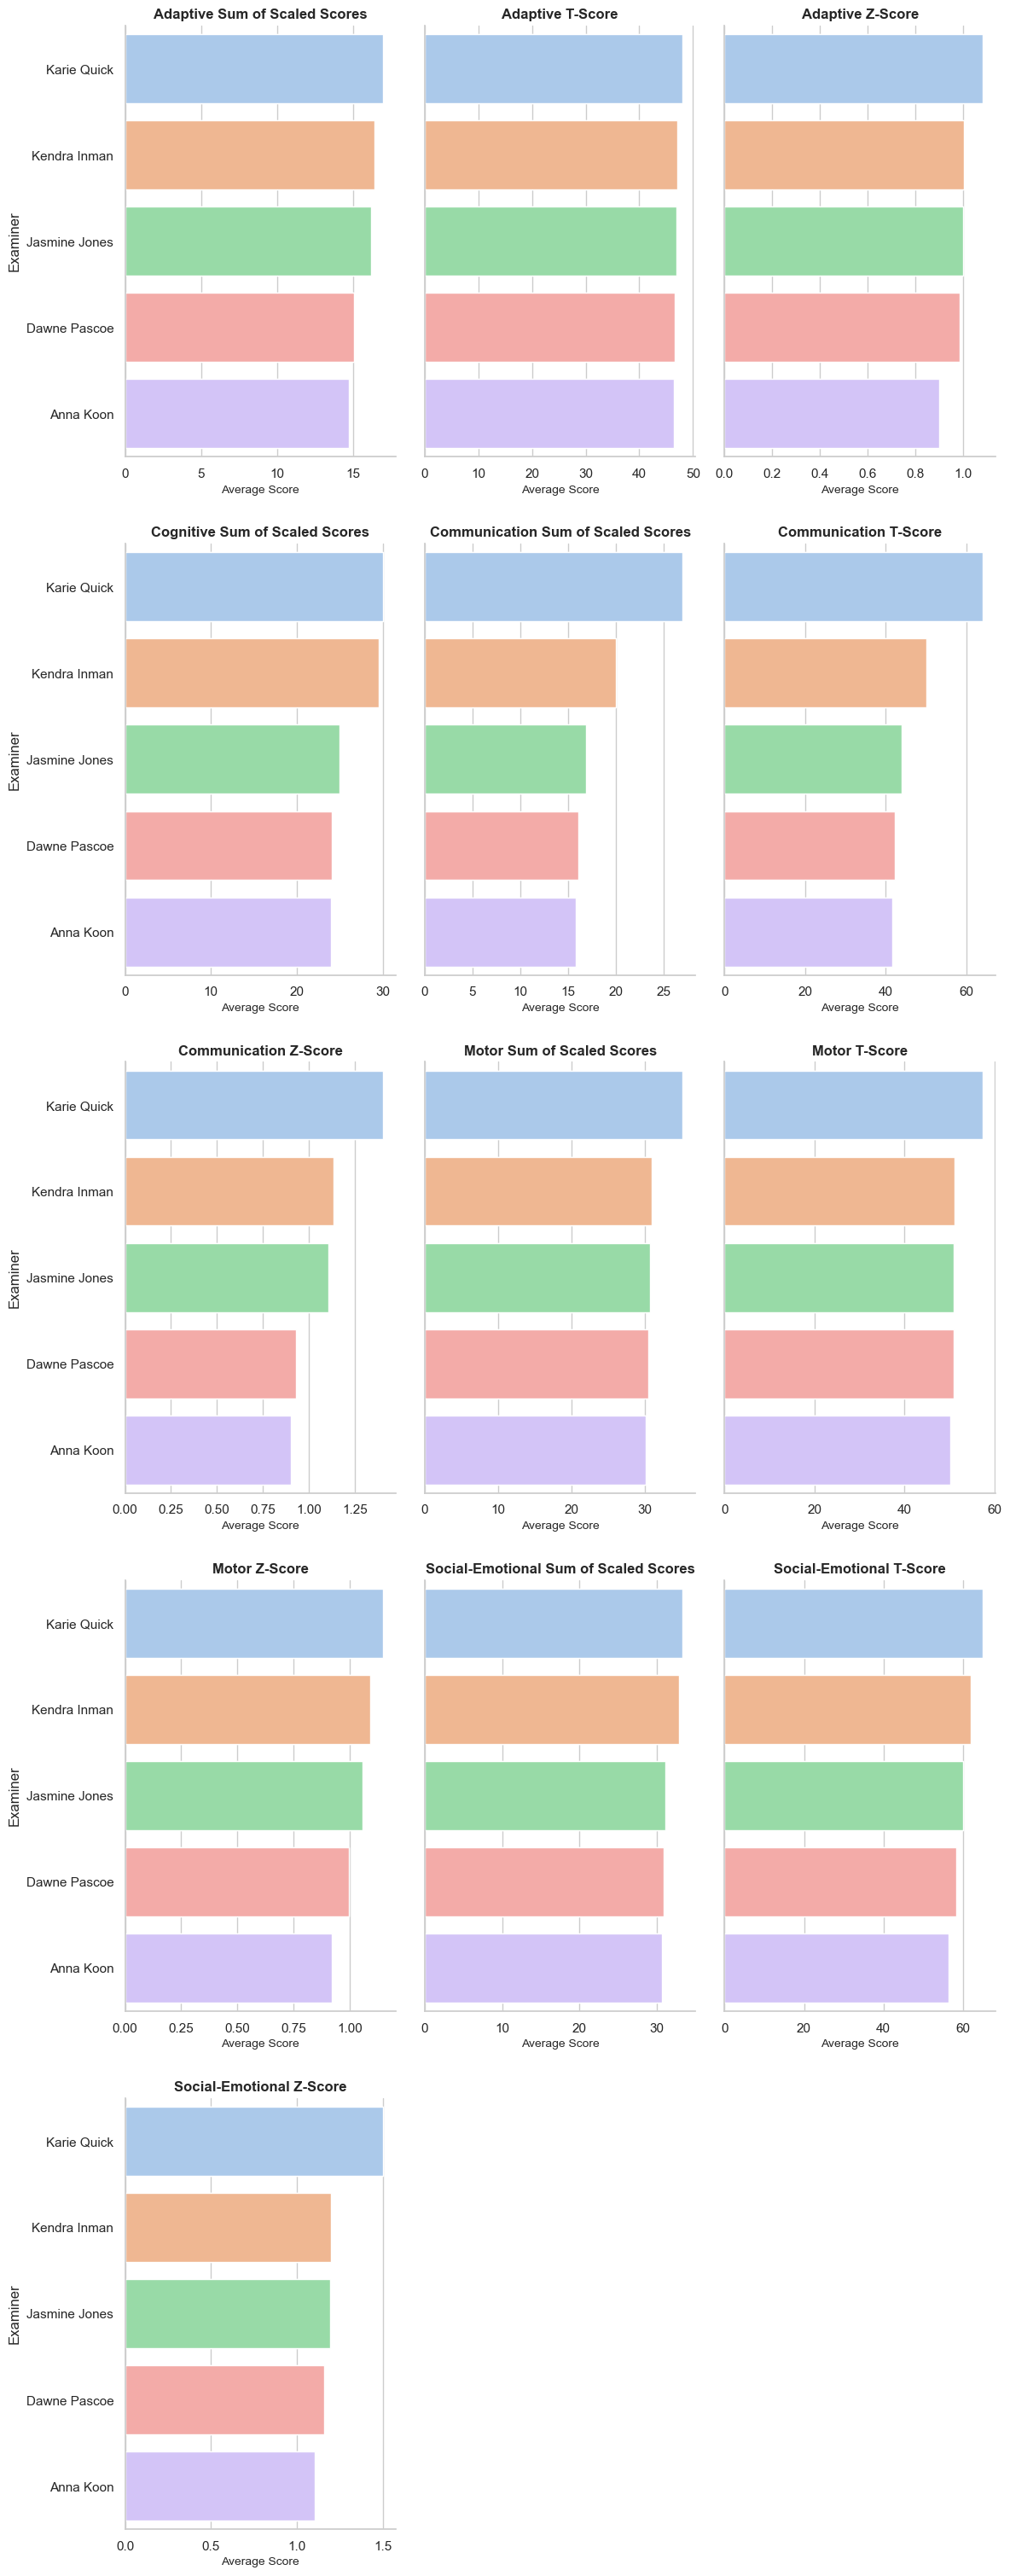

In [206]:
g = sns.FacetGrid(top_examiners_by_category, col='Score_Category', col_wrap=3, sharex=False, height=4)

g.map(sns.barplot, 'Score', 'Examiner', palette='viridis')
g.map(sns.barplot, 'Score', 'Examiner', palette='pastel')

g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=10)

g.fig.subplots_adjust(top=1.5) 

for axes in g.axes.flatten():
    axes.set_xlabel('Average Score', fontsize=10)
    axes.set_ylabel('Examiner', fontsize=12)
    axes.tick_params(labelrotation=360)

plt.show()
# Top 5 examiners based on category score

C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\iliss\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


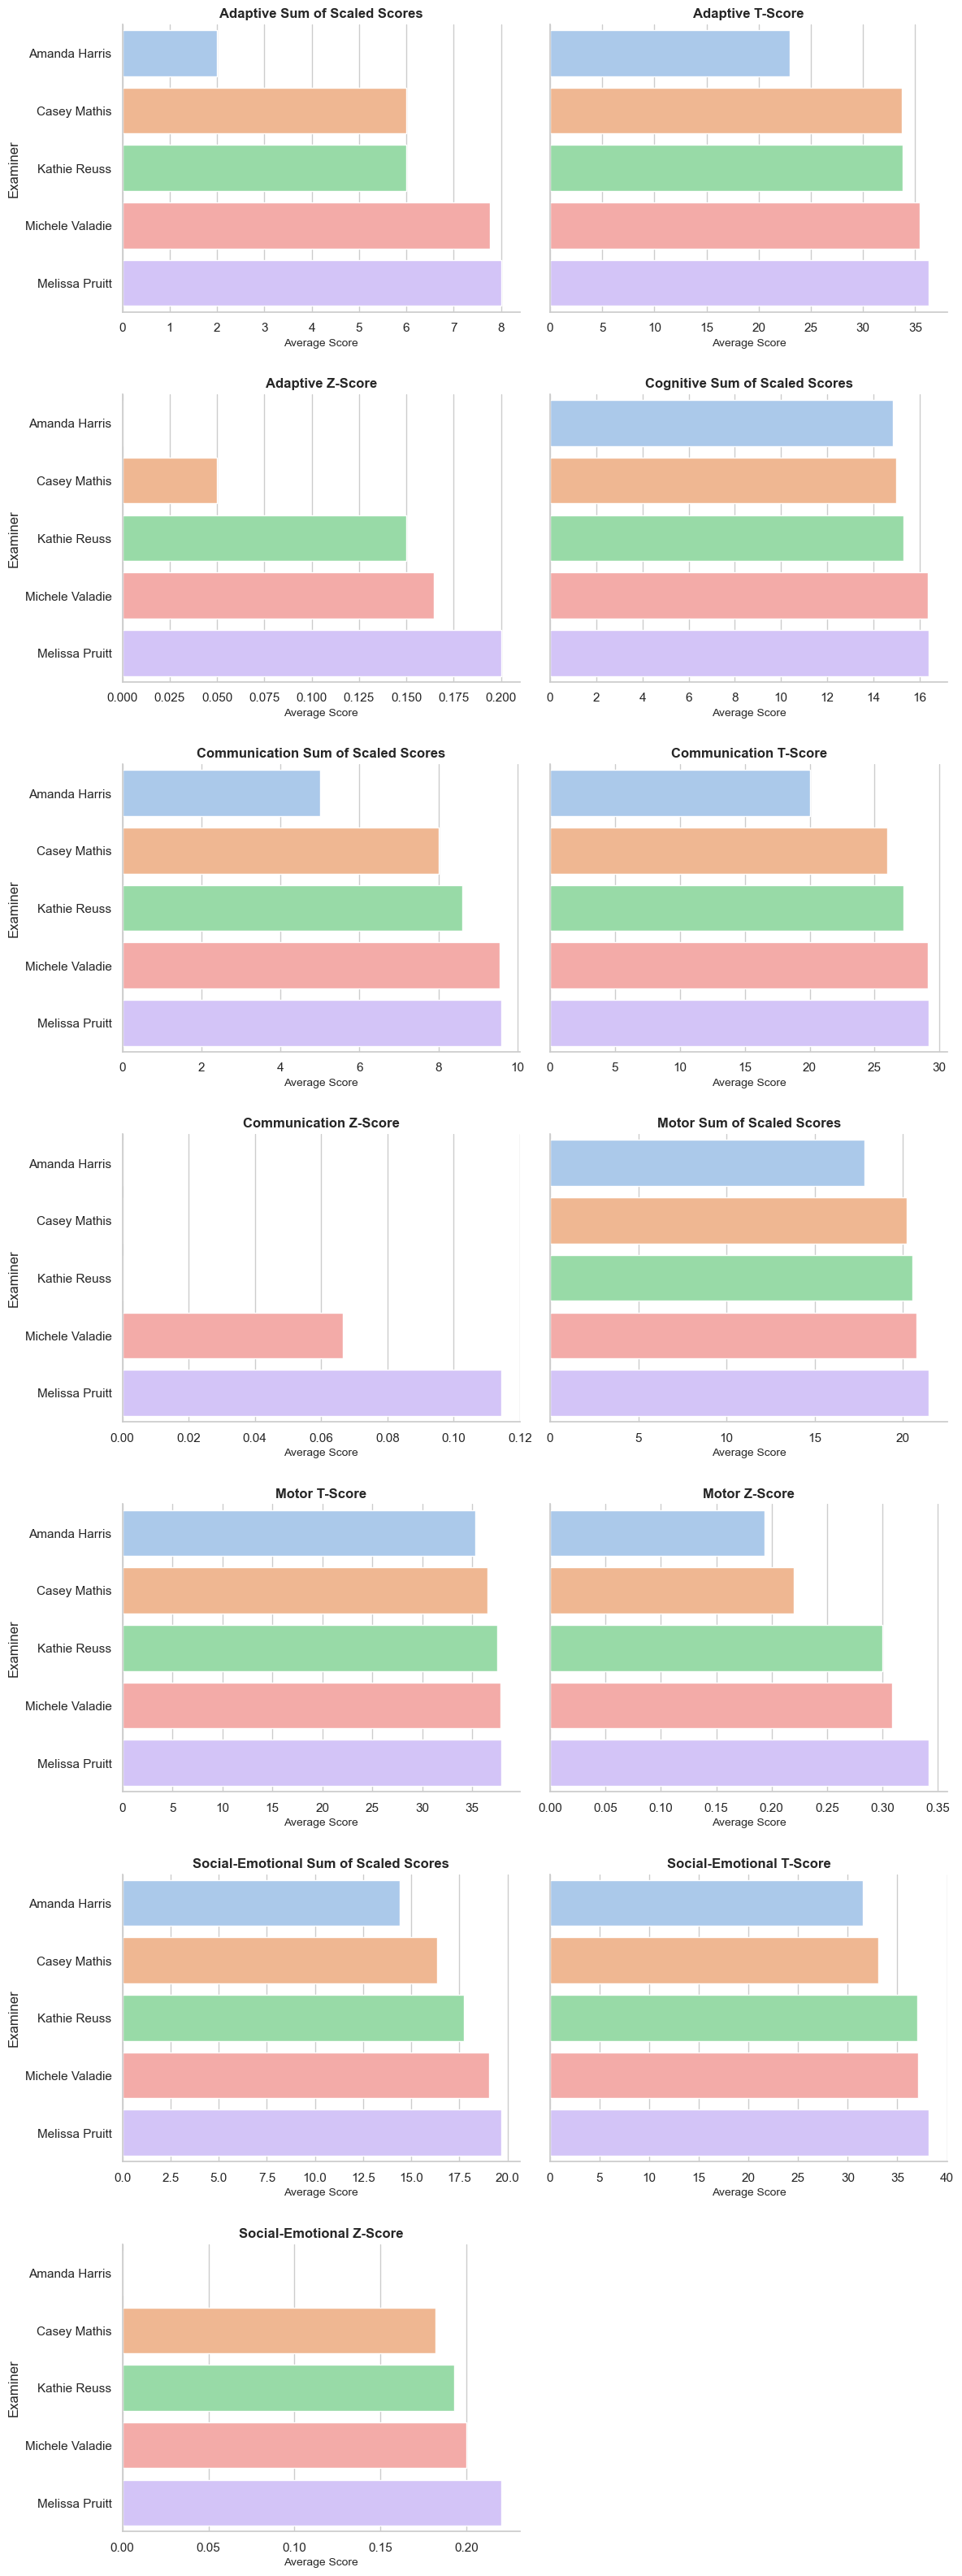

In [211]:
# bottom 5 examiners, making it more compact
g = sns.FacetGrid(bottom_examiners_by_category, col='Score_Category', col_wrap=2, sharex=False, height=3, aspect=2)

g.map(sns.barplot, 'Score', 'Examiner', palette='pastel')

g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=10)

g.fig.subplots_adjust(top=1.5) 

for axes in g.axes.flatten():
    axes.set_xlabel('Average Score', fontsize=10)
    axes.set_ylabel('Examiner', fontsize=12)
    axes.tick_params(labelrotation=360)

plt.show()

